In [17]:
import Pkg
Pkg.add("Turing")
Pkg.add("StatsPlots")
Pkg.add("Distributions")
Pkg.add("Optim")
Pkg.add("NestedSamplers")
Pkg.add("StatsBase")
Pkg.add("PyCall")
#Pkg.add(url="https://github.com/sqwayer/BridgeSampling.jl.git")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
   Installed PyCall ─ v1.95.1
    Updating `~/.julia/environments/v

In [18]:
# Import libraries.
using Turing, StatsPlots, Random, Distributions, Optim, NestedSamplers, StatsBase, PyCall

In [19]:
data = Array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, ey = data;

In [20]:
# Declare our Turing model
@model function jmodel(x,ey,y)
    # Our prior belief
    theta ~ Uniform(-0.5 * π, 0.5 * π)
    q_perp ~ Normal(0.,5.)
    #
    m = tan(theta)
    q = q_perp/cos(theta)
    #
    #for i in 1:length(y)
    #    y[i] ~ Normal.(m*x .+ q,ey)
    #end
    return y ~ MvNormal(m*x .+ q,ey)
end

jmodel (generic function with 2 methods)

In [21]:
mle_estimate = optimize(jmodel(x,ey,y), MLE())

ModeResult with maximized lp of 22.01
[0.7727521086070781, -0.14555816389265894]

In [41]:
iterations = 2000
chain = 4

# Start sampling.
chain = sample(jmodel(x,ey,y), NUTS(), MCMCDistributed(), iterations, chain, drop_warmup=true, burnin=2000)

┌ Warning: Only a single process available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC ~/.julia/packages/AbstractMCMC/bE6VB/src/sample.jl:405
┌ Info: Found initial step size
└   ϵ = 0.025
┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling (1 processes):  50%|█████████████▌             |  ETA: 0:00:00┌ Info: Found initial step size
└   ϵ = 0.025
┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling (1 processes): 100%|███████████████████████████| Time: 0:00:00


Chains MCMC chain (2000×14×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 0.76 seconds
Compute duration  = 0.67 seconds
parameters        = theta, q_perp
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

       theta    0.7642    0.0480     0.0005    0.0008   2762.8476    1.0003    ⋯
      q_perp   -0.1424    0.0244     0.0003    0.0004   2674.4467    1.0012    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

 

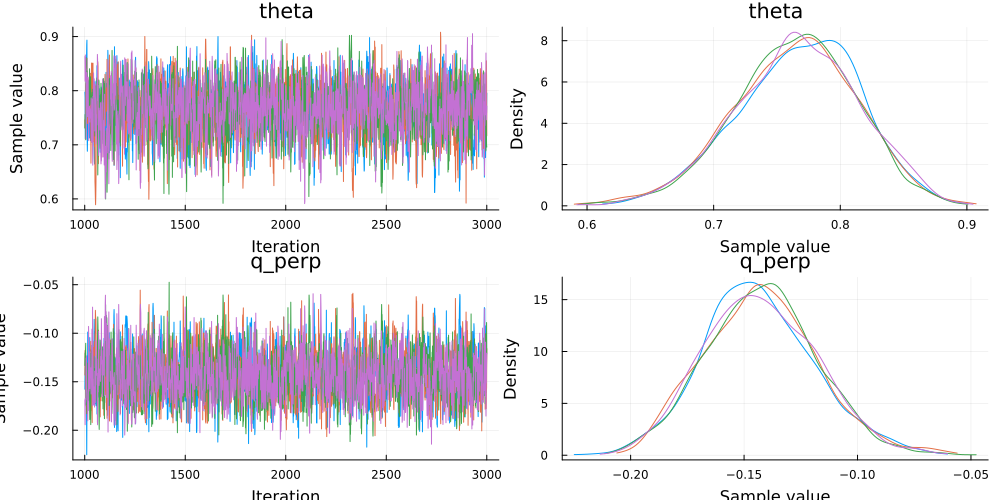

In [23]:
# Plot a summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
plot(chain)

In [24]:
qmean = mean(chain[:,:q_perp,:]/cos.(chain[:,:theta,:]))
mmean = mean(tan.(chain[:,:theta,:]))
println(mmean," ",qmean)

0.9649074904590246 -9.901664644359241e-5


In [106]:
ichain = sample(jmodel(x,ey,y), IS(), 50000)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:03


Chains MCMC chain (50000×3×1 Array{Float64, 3}):

Log evidence      = 13.230465155760871
Iterations        = 1:1:50000
Number of chains  = 1
Samples per chain = 50000
Wall duration     = 3.48 seconds
Compute duration  = 3.48 seconds
parameters        = theta, q_perp
internals         = lp

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

       theta   -0.0014    0.9073     0.0041    0.0043   49036.8190    1.0000   ⋯
      q_perp   -0.0086    4.9958     0.0223    0.0215   49554.0181    1.0000   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

       theta   -1.4889   -0.7930   -0.0039    0.7879    1.4931
      q_perp   -9.8980   -3.3874   -0.0030    3.3622    9.7498


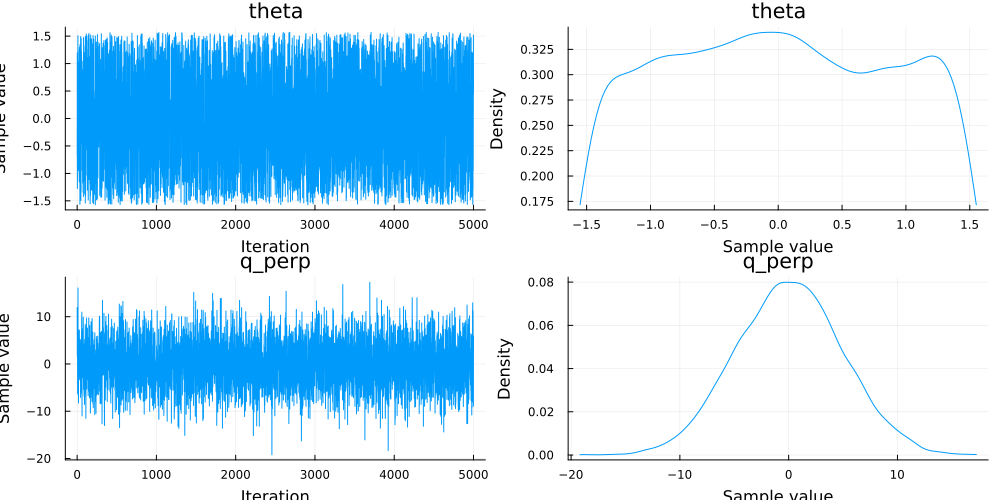

In [105]:
plot(ichain)